In [1]:
import numpy as np
import pandas as pd
import copy
from keras import models, layers, callbacks

Using TensorFlow backend.


In [2]:
data = pd.read_csv("Dataset/adult.data", header=None)
data_columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
data.columns = data_columns
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [4]:
data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

將收入>50專換為1，<=50轉換為-1

In [5]:
tmp = copy.deepcopy(data.income)
for (index, each) in enumerate(tmp):
    if each == " <=50K":
        data.income[index] = 0
    else:
        data.income[index] = 1
del tmp
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [6]:
data = pd.get_dummies(data, columns=[
    "workclass", "education","marital-status","occupation","relationship","race", "sex", "native-country"
])
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
data.age = data.age.astype(float)
data.fnlwgt = data.fnlwgt.astype(float)
data["education-num"] = data["education-num"].astype(float)
data["hours-per-week"] = data["hours-per-week"].astype(float)
data["capital-gain"] = data["capital-gain"].astype(float)
data["capital-loss"] = data["capital-loss"].astype(float)
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,0.0,0.0,38.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40.0,154374.0,9.0,0.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58.0,151910.0,9.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22.0,201490.0,9.0,0.0,0.0,20.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
data.shape

(32561, 109)

In [9]:
Y = np.asarray(data["income"]).astype('float32')
X = data.drop(["income"], axis=1).to_numpy()
print(X.shape, Y.shape)

(32561, 108) (32561,)


In [10]:
model = models.Sequential()

In [11]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [12]:
model.add(layers.Dense(200, input_shape=(108,), activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='adam',  loss='binary_crossentropy',  metrics=['accuracy'])

In [14]:
history = model.fit(X, Y, epochs=500, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Train on 26048 samples, validate on 6513 samples
Epoch 1/500
26048/26048 [==============================] - 3s 134us/step - loss: 583.0868 - accuracy: 0.6742 - val_loss: 681.7944 - val_accuracy: 0.2457
Epoch 2/500
26048/26048 [==============================] - 3s 114us/step - loss: 351.7712 - accuracy: 0.6837 - val_loss: 67.8017 - val_accuracy: 0.7823
Epoch 3/500
26048/26048 [==============================] - 3s 109us/step - loss: 254.0327 - accuracy: 0.6800 - val_loss: 498.6501 - val_accuracy: 0.7754
Epoch 4/500
26048/26048 [==============================] - 3s 106us/step - loss: 209.4950 - accuracy: 0.6847 - val_loss: 253.3154 - val_accuracy: 0.7866
Epoch 5/500
26048/26048 [==============================] - 3s 108us/step - loss: 147.8910 - accuracy: 0.6867 - val_loss: 134.1550 - val_accuracy: 0.2457
Epoch 6/500
26048/26048 [==============================] - 3s 108us/step - loss: 114.9809 - accuracy: 0.6842 - val_loss: 451.1819 - val_accuracy: 0.7648
Epoch 7/500
26048/26048 [=========

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


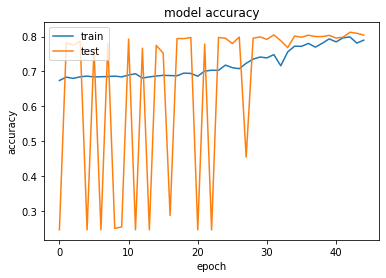

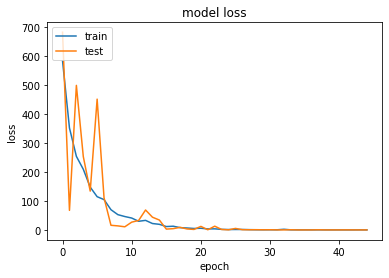

In [15]:

import matplotlib.pyplot as plt
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model.save('model/income_perdict')